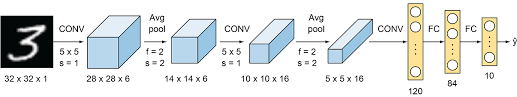

Insted of average pooling we use max pooling for better result. Because max pooling was not proposed when Lenet 5 was introduced


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import Sequential
from keras.datasets import mnist

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

x_train /= 255
x_test /= 255

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [24]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [25]:
model = Sequential()

# Conv Layer 1
model.add(Conv2D(6, kernel_size = (5, 5), strides = 1, 
                 padding = 'valid', activation = 'relu', 
                 input_shape = (28, 28, 1)))

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

# Conv Layer 2
model.add(Conv2D(16, kernel_size = (5, 5), strides = 1, 
                 padding = 'valid', activation = 'relu'))

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

# Flatten
model.add(Flatten())

# Fully connected layer (DNN)
# 1st Layer
model.add(Dense(120, activation = 'relu'))

#2nd Layer
model.add(Dense(84, activation = 'relu'))

# Output layer
model.add(Dense(10, activation = 'softmax'))

model.summary()

C:\Users\younu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [27]:
history = model.fit(x_train, y_train, epochs = 10, 
                    batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8296 - loss: 0.5377 - val_accuracy: 0.9792 - val_loss: 0.0642
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9768 - loss: 0.0743 - val_accuracy: 0.9827 - val_loss: 0.0561
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9833 - loss: 0.0518 - val_accuracy: 0.9876 - val_loss: 0.0430
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9871 - loss: 0.0430 - val_accuracy: 0.9864 - val_loss: 0.0405
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9881 - loss: 0.0357 - val_accuracy: 0.9839 - val_loss: 0.0492
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9876 - val_loss: 0.0394
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9860 - val_loss: 0.0453
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 

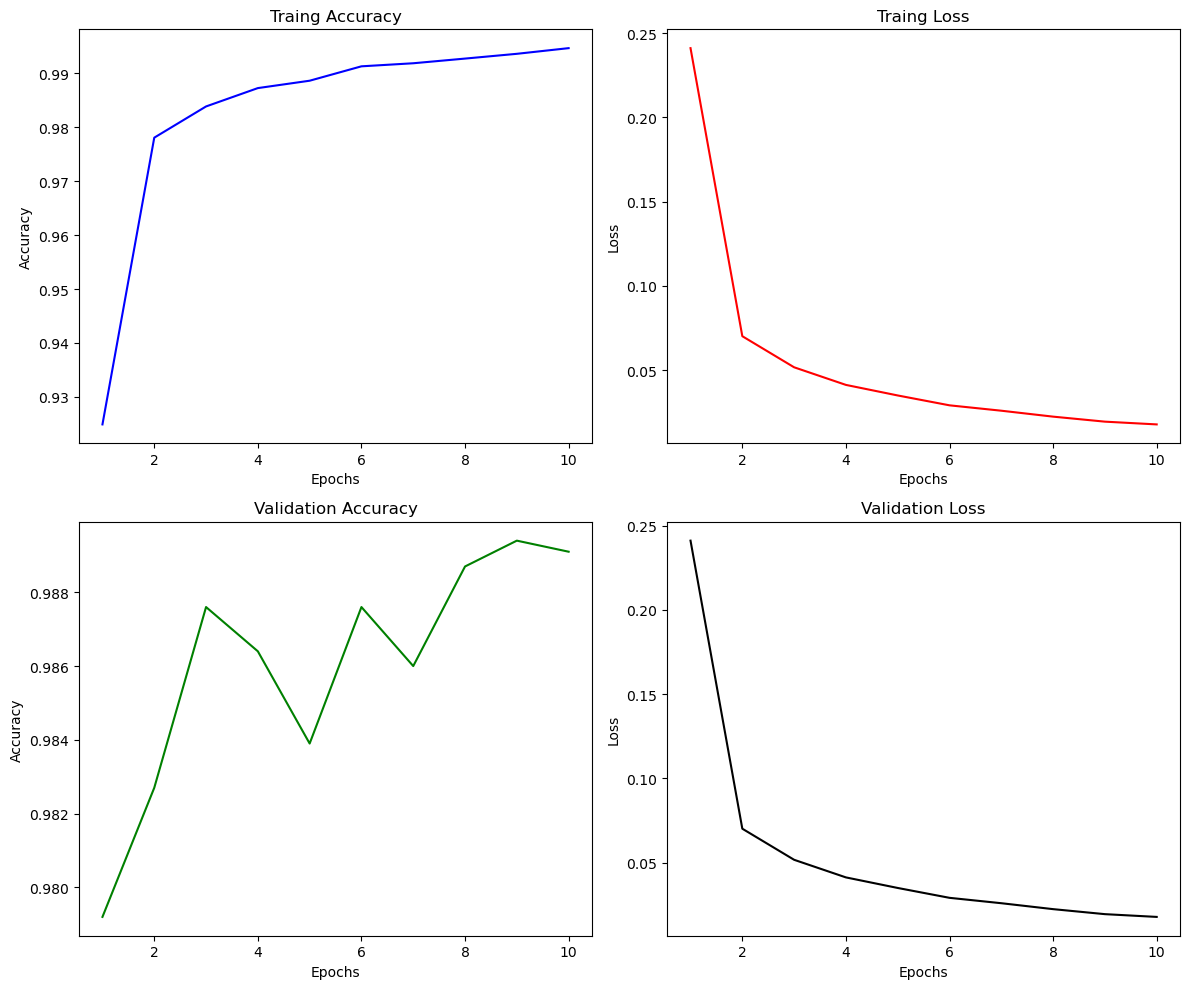

In [29]:
x = np.linspace(1, 10, 10)

fig, axs = plt.subplots(2, 2, figsize = (12, 10))

axs[0, 0].plot(x, history.history['accuracy'], 'b')
axs[0, 0].set_title('Traing Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')

axs[0, 1].plot(x, history.history['loss'], 'r')
axs[0, 1].set_title('Traing Loss')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')

axs[1, 0].plot(x, history.history['val_accuracy'], 'g')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')

axs[1, 1].plot(x, history.history['loss'], 'k')
axs[1, 1].set_title('Validation Loss')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')

plt.tight_layout()
plt.show()